In [1]:
import osmnx as ox, geopandas as gpd
import pandas as pd

In [2]:
gdf = gpd.read_file("wegdelen-shape.gpkg")

In [4]:
gdf.head()

,ogc_fid,functiecd,functie,fysvoorkcd,fysvoorkmn,fysvkplscd,fysvkmplus,id,guid,code,...,verharding,gebrfuncd,gebrfuncti,situering,groenwpkcd,groenwrkpk,straatnmcd,straatnaam,counter,geometry
0,1,RLW,rijbaan lokale weg,OVH,open verharding,OVH_BSS,betonstraatstenen,168707.0,{0A528910-2CCB-2B6B-E053-293C0B0A6175},100995,...,Betonsteen keiformaat,2a-SH,Stedelijke Hoofdweg,Links,None,None,10960,Lozerlaan,1.0,"MULTIPOLYGON (((76567.558 450918.408, 76573.06..."
1,2,RLW,rijbaan lokale weg,OVH,open verharding,OVH_BSS,betonstraatstenen,168708.0,{0A528910-2CF7-2B6B-E053-293C0B0A6175},100996,...,Betonsteen keiformaat,2a-SH,Stedelijke Hoofdweg,Links,None,None,10960,Lozerlaan,2.0,"MULTIPOLYGON (((76664.8 450855.858, 76663.595 ..."
2,3,VTP,voetpad,OVH,open verharding,OVH_TGL,tegels,168710.0,{0A528910-2F4E-2B6B-E053-293C0B0A6175},90545,...,Betontegel 30*30,4-WO,Wijkontsluitingsweg,Rechts,None,None,10807,Loosduinse Hoofdstraat,3.0,"MULTIPOLYGON (((75612.327 452150.147, 75612.31..."
3,4,RLW,rijbaan lokale weg,OVH,open verharding,OVH_GBK,gebakken klinkers,168711.0,{0A528910-364C-2B6B-E053-293C0B0A6175},26112,...,Klinker keiformaat,5-WS,Woon- cq Wijkstraat,Totale breedte,None,None,4090,Domburglaan,4.0,"MULTIPOLYGON (((75115.951 453706.193, 75111.40..."
4,5,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,168719.0,{0A528910-365A-2B6B-E053-293C0B0A6175},26128,...,Asfaltbeton,2b-SH,S-route,Rechts,None,None,11210,Machiel Vrijenhoeklaan,5.0,"MULTIPOLYGON (((75416.687 453839.502, 75406.21..."


In [5]:
gdf.columns

Index(['ogc_fid', 'functiecd', 'functie', 'fysvoorkcd', 'fysvoorkmn',
       'fysvkplscd', 'fysvkmplus', 'id', 'guid', 'code', 'identifica',
       'tijdreg', 'op_talud', 'bouwjaar', 'leeftijd', 'oppervlakt', 'nummer',
       'lengte', 'breedte', 'buurtcode', 'buurt', 'stadsdlcd', 'stadsdeel',
       'wijkcode', 'wijk', 'wegvak_id', 'typeondrcd', 'typeondrdl',
       'vrhrdingcd', 'verharding', 'gebrfuncd', 'gebrfuncti', 'situering',
       'groenwpkcd', 'groenwrkpk', 'straatnmcd', 'straatnaam', 'counter',
       'geometry'],
      dtype='object')

<Axes: >

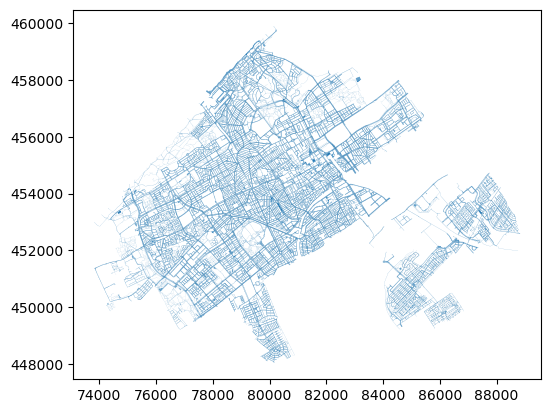

In [6]:
gdf.plot()

In [27]:
gdf.wijk.unique()

array(['Loosduinen', 'Kijkduin en Ockenburgh', 'Bohemen en Meer en Bos',
       'Kraayenstein en Vroondaal', 'Waldeck', 'Vogelwijk', 'Bouwlust',
       'Leidschenveen', 'Bomen- en Bloemenbuurt', 'Ypenburg', 'Hoornwijk',
       'Forepark', 'Vruchtenbuurt', 'Leyenburg', 'Mariahoeve en Marlot',
       'Laakkwartier en Spoorwijk', 'Benoordenhout', 'Stationsbuurt',
       'Bezuidenhout', 'Transvaalkwartier', 'Schildersbuurt', None,
       'Groente- en Fruitmarkt', 'Binckhorst', 'Haagse Bos', 'Centrum',
       'Zeeheldenkwartier', 'Willemspark', 'Archipelbuurt', 'Duinoord',
       'Westbroekpark en Duttendel', 'Rustenburg en Oostbroek',
       'Regentessekwartier', 'Van Stolkpark en Scheveningse Bosjes',
       'Duindorp', 'Valkenboskwartier', 'Zorgvliet', 'Oostduinen',
       'Belgisch Park', 'Scheveningen', 'Geuzen- en Statenkwartier',
       'Zuiderpark', 'Morgenstond', 'Moerwijk', 'Wateringse Veld'],
      dtype=object)

In [81]:
Area = gdf[gdf["wijk"].isin(["Zorgvliet", 'Geuzen- en Statenkwartier', 'Van Stolkpark en Scheveningse Bosjes', 'Duinoord'])].reset_index()

In [78]:
gdf.functie.unique()

array(['rijbaan lokale weg', 'voetpad', 'fietspad', 'voetgangersgebied',
       'parkeervlak', 'OV-baan', 'woonerf', 'ruiterpad', 'inrit'],
      dtype=object)

In [83]:
Area = Area[~Area["functie"].isin(["voetpad", "fietspad", "parkeervlak", 'voetgangersgebied', 'OV-baan', 'ruiterpad'])].reset_index()

In [87]:
Area.columns

Index(['level_0', 'index', 'ogc_fid', 'functiecd', 'functie', 'fysvoorkcd',
       'fysvoorkmn', 'fysvkplscd', 'fysvkmplus', 'id', 'guid', 'code',
       'identifica', 'tijdreg', 'op_talud', 'bouwjaar', 'leeftijd',
       'oppervlakt', 'nummer', 'lengte', 'breedte', 'buurtcode', 'buurt',
       'stadsdlcd', 'stadsdeel', 'wijkcode', 'wijk', 'wegvak_id', 'typeondrcd',
       'typeondrdl', 'vrhrdingcd', 'verharding', 'gebrfuncd', 'gebrfuncti',
       'situering', 'groenwpkcd', 'groenwrkpk', 'straatnmcd', 'straatnaam',
       'counter', 'geometry'],
      dtype='object')

In [90]:
Area = Area[["functie", 'lengte', "breedte", "wijk", "verharding", "straatnaam", "geometry"]].copy()

In [91]:
Area

,functie,lengte,breedte,wijk,verharding,straatnaam,geometry
0,rijbaan lokale weg,160.0,7.34,Van Stolkpark en Scheveningse Bosjes,Asfaltbeton,Professor B. M. Teldersweg,"MULTIPOLYGON (((79738.944 457037.664, 79705.98..."
1,rijbaan lokale weg,99.0,9.51,Van Stolkpark en Scheveningse Bosjes,Asfaltbeton,Van Stolkweg,"MULTIPOLYGON (((79592.247 457061.854, 79624.43..."
2,rijbaan lokale weg,79.0,12.02,Zorgvliet,Asfaltbeton,Johan de Wittlaan,"MULTIPOLYGON (((79554.026 456923.253, 79548.74..."
3,rijbaan lokale weg,2.0,10.02,Geuzen- en Statenkwartier,Betonsteen keiformaat,Bentinckstraat,"MULTIPOLYGON (((78902.34 456856.691, 78908.583..."
4,rijbaan lokale weg,2.0,13.10,Geuzen- en Statenkwartier,Rood asfalt,Van Boetzelaerlaan,"MULTIPOLYGON (((78551.145 457025.563, 78555.64..."
...,...,...,...,...,...,...,...
2338,rijbaan lokale weg,2.0,10.08,Zorgvliet,Rood asfalt,Stadhouderslaan,"MULTIPOLYGON (((79128.781 456065.157, 79122.52..."
2339,rijbaan lokale weg,2.0,10.08,Zorgvliet,Rood asfalt,Stadhouderslaan,"MULTIPOLYGON (((79128.781 456065.157, 79122.52..."
2340,rijbaan lokale weg,2.0,14.90,Zorgvliet,Betontegel 30*30,Stadhouderslaan,"MULTIPOLYGON (((79169.561 456040.924, 79172.50..."
2341,rijbaan lokale weg,2.0,14.90,Zorgvliet,Betontegel 30*30,Stadhouderslaan,"MULTIPOLYGON (((79169.561 456040.924, 79172.50..."


In [84]:
len(gdf.wijk.unique())

45

<Axes: >

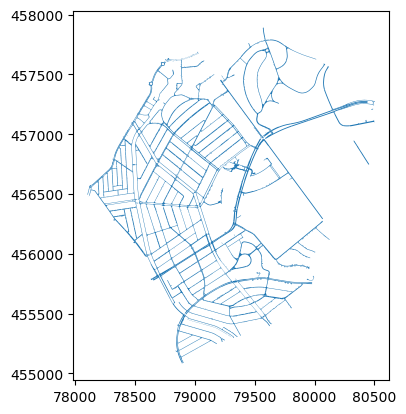

In [92]:
Area.plot()

In [64]:
Area.iloc[1]

level_0                                                      13
index                                                     50129
ogc_fid                                                   50130
functiecd                                                   RLW
functie                                      rijbaan lokale weg
fysvoorkcd                                                  GVH
fysvoorkmn                                  gesloten verharding
fysvkplscd                                              GVH_ASF
fysvkmplus                                               asfalt
id                                                     671539.0
guid                     {0A528910-49F1-2B6B-E053-293C0B0A6175}
code                                                      36556
identifica           G0518.08D6E6F2-8840-653A-E050-2A0A313C2FF8
tijdreg                                          20190612115647
op_talud                                                     Ja
bouwjaar                                

In [75]:
belangrijkste_weg = Area[Area["straatnaam"].isin(["Johan de Wittlaan"]) ].reset_index(drop = True)

In [76]:
belangrijkste_weg

,level_0,index,ogc_fid,functiecd,functie,fysvoorkcd,fysvoorkmn,fysvkplscd,fysvkmplus,id,...,verharding,gebrfuncd,gebrfuncti,situering,groenwpkcd,groenwrkpk,straatnmcd,straatnaam,counter,geometry
0,15,50196,50197,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,671510.0,...,Asfaltbeton,2b-SH,S-route,Links,None,None,8480,Johan de Wittlaan,50197.0,"MULTIPOLYGON (((79554.026 456923.253, 79548.74..."
1,26,50899,50900,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672151.0,...,Asfaltbeton,5-WS,Woon- cq Wijkstraat,Links,None,None,8480,Johan de Wittlaan,50900.0,"MULTIPOLYGON (((79389.799 456219.328, 79428.86..."
2,37,50922,50923,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672153.0,...,Asfaltbeton,2b-SH,S-route,Rechts,None,None,8480,Johan de Wittlaan,50923.0,"MULTIPOLYGON (((79334.086 456327.614, 79334.10..."
3,38,50923,50924,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672154.0,...,Asfaltbeton,2b-SH,S-route,Links,None,None,8480,Johan de Wittlaan,50924.0,"MULTIPOLYGON (((79351.851 456337.471, 79348.82..."
4,120,51147,51148,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,672262.0,...,Asfaltbeton,2b-SH,S-route,Rechts,None,None,8480,Johan de Wittlaan,51148.0,"MULTIPOLYGON (((79441.396 456709.512, 79441.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,4846,121220,121203,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,4764128.0,...,Asfaltbeton,5-WS,Woon- cq Wijkstraat,Rechts,None,None,8480,Johan de Wittlaan,121203.0,"MULTIPOLYGON (((79449.825 456192.136, 79452.75..."
59,4996,122396,122373,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,4764121.0,...,Asfaltbeton,5-WS,Woon- cq Wijkstraat,Rechts,None,None,8480,Johan de Wittlaan,122373.0,"MULTIPOLYGON (((79538.608 456115.35, 79544.31 ..."
60,5823,134917,134914,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,4947205.0,...,Rood asfalt,7-FP,Fietspaden,Links,None,None,8480,Johan de Wittlaan,134914.0,"MULTIPOLYGON (((79559.711 456074.358, 79568.39..."
61,5827,135014,135011,RLW,rijbaan lokale weg,GVH,gesloten verharding,GVH_ASF,asfalt,6098859.0,...,Rood asfalt,7-FP,Fietspaden,Rechts,None,None,8480,Johan de Wittlaan,135011.0,"MULTIPOLYGON (((79355.059 456484.257, 79352.79..."


<Axes: >

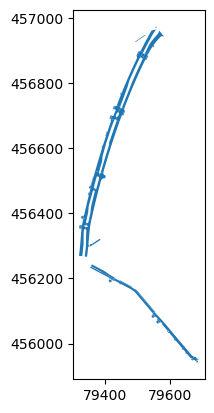

In [77]:
belangrijkste_weg.plot()